In [114]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [115]:
df=pd.read_csv('transaction_sep_oct.csv')

In [116]:
df.head()

,time,total
0,01-09-2021,1653794
1,02-09-2021,2373894
2,03-09-2021,2415128
3,04-09-2021,2299748
4,05-09-2021,177030


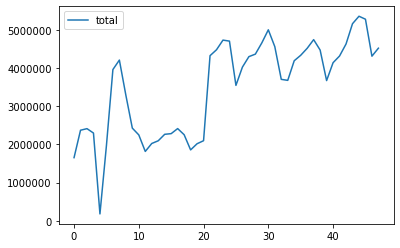

In [117]:
df.plot()
plt.ticklabel_format(style='plain', axis='y')

In [118]:
df.columns = ['ds','y']
df.head()

,ds,y
0,01-09-2021,1653794
1,02-09-2021,2373894
2,03-09-2021,2415128
3,04-09-2021,2299748
4,05-09-2021,177030


In [119]:
df['ds'] = pd.to_datetime(df['ds'])

In [120]:
df.head()

,ds,y
0,2021-01-09,1653794
1,2021-02-09,2373894
2,2021-03-09,2415128
3,2021-04-09,2299748
4,2021-05-09,177030


In [121]:
from fbprophet import Prophet

In [122]:
# Initialize the Model
model=Prophet()

In [123]:
df.columns

Index(['ds', 'y'], dtype='object')

In [124]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [125]:
model.component_modes

{'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [126]:
df.tail()

,ds,y
43,2021-10-14,5169986
44,2021-10-15,5365872
45,2021-10-16,5287959
46,2021-10-17,4317623
47,2021-10-18,4527405


In [127]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=1)

In [128]:
future_dates.tail()

,ds
44,2021-11-09
45,2021-11-10
46,2021-12-09
47,2021-12-10
48,2021-12-11


In [129]:
future_dates.head()

,ds
0,2021-01-09
1,2021-01-10
2,2021-02-09
3,2021-02-10
4,2021-03-09


In [130]:
prediction=model.predict(future_dates)

In [131]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-09,3.072128e+06,1.601791e+06,4.585184e+06,3.072128e+06,3.072128e+06,59950.293828,59950.293828,59950.293828,59950.293828,59950.293828,59950.293828,0.0,0.0,0.0,3.132079e+06
1,2021-01-10,3.074060e+06,1.163110e+06,4.143066e+06,3.074060e+06,3.074060e+06,-354258.866839,-354258.866839,-354258.866839,-354258.866839,-354258.866839,-354258.866839,0.0,0.0,0.0,2.719801e+06
2,2021-02-09,3.131997e+06,1.185118e+06,4.139202e+06,3.131997e+06,3.131997e+06,-546346.444018,-546346.444018,-546346.444018,-546346.444018,-546346.444018,-546346.444018,0.0,0.0,0.0,2.585650e+06
3,2021-02-10,3.133928e+06,1.820341e+06,4.962411e+06,3.133928e+06,3.133928e+06,284311.576840,284311.576840,284311.576840,284311.576840,284311.576840,284311.576840,0.0,0.0,0.0,3.418239e+06
4,2021-03-09,3.186071e+06,1.132191e+06,4.065758e+06,3.186071e+06,3.186071e+06,-546346.444018,-546346.444018,-546346.444018,-546346.444018,-546346.444018,-546346.444018,0.0,0.0,0.0,2.639725e+06


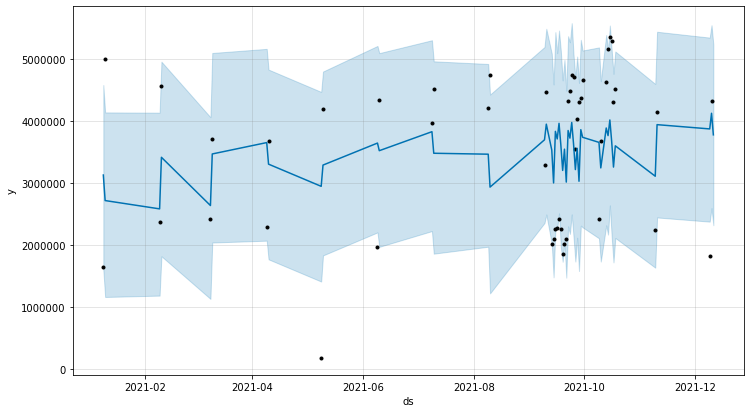

In [132]:
### plot the predicted projection
model.plot(prediction)
plt.ticklabel_format(style='plain', axis='y')

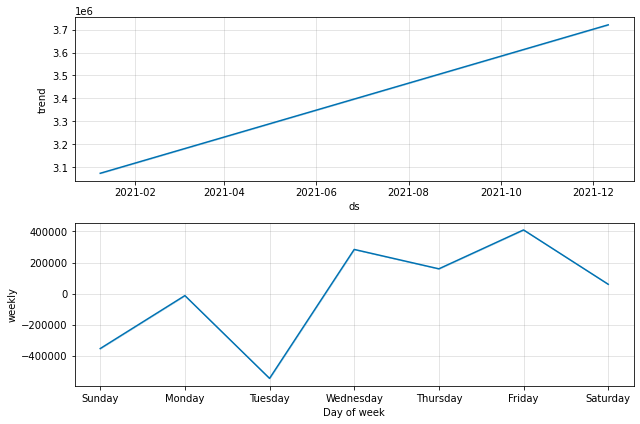

In [133]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)
plt.ticklabel_format(style='plain', axis='y')

In [134]:
df.head()

,ds,y
0,2021-01-09,1653794
1,2021-02-09,2373894
2,2021-03-09,2415128
3,2021-04-09,2299748
4,2021-05-09,177030


In [135]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='120 days', period='60 days', horizon = '60 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-06-13 00:00:00 and 2021-10-11 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-07-09,6.081022e+05,-5.953896e+05,1.838469e+06,3966728,2021-06-13
1,2021-07-10,1.381123e+05,-1.020499e+06,1.375479e+06,4524241,2021-06-13
2,2021-08-09,2.509859e+06,1.352313e+06,3.645327e+06,4215316,2021-06-13
3,2021-08-10,-7.201117e+05,-1.930928e+06,3.989562e+05,4751628,2021-06-13
4,2021-09-09,4.564762e+06,3.087876e+06,6.114546e+06,3295075,2021-08-12


In [136]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,1.946850e+12,1.395296e+06,1.364881e+06,0.267548,0.256507,0.666667
1,5 days,2.940734e+12,1.714857e+06,1.691591e+06,0.320212,0.323810,0.333333
2,6 days,3.007354e+12,1.734172e+06,1.716034e+06,0.342753,0.324129,0.333333
3,7 days,2.472458e+12,1.572405e+06,1.533273e+06,0.322375,0.324129,0.666667
4,26 days,4.884390e+12,2.210066e+06,1.982445e+06,0.477835,0.324129,0.666667


In [137]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,1.946850e+12,1.395296e+06,1.364881e+06,0.267548,0.256507,0.666667
1,5 days,2.940734e+12,1.714857e+06,1.691591e+06,0.320212,0.323810,0.333333
2,6 days,3.007354e+12,1.734172e+06,1.716034e+06,0.342753,0.324129,0.333333
3,7 days,2.472458e+12,1.572405e+06,1.533273e+06,0.322375,0.324129,0.666667
4,26 days,4.884390e+12,2.210066e+06,1.982445e+06,0.477835,0.324129,0.666667


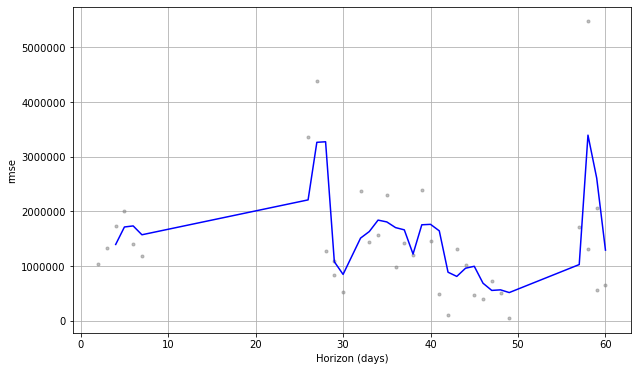

In [138]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.ticklabel_format(style='plain', axis='y')